<h1 align="center"> Machine Learning: Assignment 1</h1><br>

In [2]:
%matplotlib inline
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

<h2 align="center"> Problem 1</h2><br>

<strong><p style="font-size:120%;"></strong> Download the Weather data set (a simple data set describing whether or not to play tennis based on the weather conditions)

In [3]:
weather = pd.read_csv('data/weather_dataset.csv')

<strong></strong> Represent the following table using 
a data structure of your choice



In [4]:
weather

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [5]:
#check the datatypes of each column 
weather.dtypes

Day             int64
outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

<ul>
  <li>Calculate the mean temperature and mean humidity</li>
  <li>Print outlook and play for 
those days where the temperature is greater than the 
average temperature</li>
  <li>Print outlook and play for those days where the humidity is greater than the 
average humidity</li>
  <li>Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation</li>C = (F-32) *5/9
</ul>

In [6]:
mean_temp = np.sum(weather.temperature.values) / float(len(weather.temperature.values))
mean_humid = np.sum(weather.humidity.values) / float(len(weather.humidity.values))

print 'mean temperature: ', mean_temp
print 'mean humid: ', mean_humid

mean temperature:  73.5714285714
mean humid:  81.6428571429


Print outlook and play for those days where the temperature is greater than the average temperature

In [7]:
temp_condition = weather['temperature'] > mean_temp

great_mean_temp = weather[['Day','outlook']][temp_condition]
pd.DataFrame(great_mean_temp)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
9,10,rainy
10,11,sunny
12,13,overcast


Print outlook and play for those days where the humidity is greater than the average humidity

In [8]:
humid_condition = weather['humidity'] > mean_humid

great_mean_humid = weather[['Day','outlook']][humid_condition]
pd.DataFrame(great_mean_humid)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
3,4,rainy
7,8,sunny
11,12,overcast
13,14,rainy


Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation 
C = (F-32) *5/9 

In [9]:
weather['Celsius'] = weather['temperature'].apply(lambda x:(x -32.0) *5.0/9)
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000
5,6,rainy,65,70,True,no,18.333333
6,7,overcast,64,65,True,yes,17.777778
7,8,sunny,72,95,False,no,22.222222
8,9,sunny,69,70,False,yes,20.555556
9,10,rainy,75,80,False,yes,23.888889


<strong><p style="font-size:120%;">1.</strong> How often do you play tennis independent of the other attributes?

In [10]:
def NoString(x):
    if x == 'no':
        y = 0
    else:
        y = 1.0
    return y

weather.play = weather.play.apply(NoString)
print weather.play.sum()/float(len(weather.play))
weather.play.head(15)

0.642857142857


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: float64

<strong><p style="font-size:120%;">2.</strong> How often do you play tennis when it is &quot;sunny&quot;?

In [11]:
#data.groupby('month')['date'].count()
len(weather[(weather['outlook'] == 'sunny') & (weather['play'] == 1)]) / float(len(weather))
#weather[weather.outlook == 'sunny'].play

0.14285714285714285

<strong><p style="font-size:120%;">3.</strong> Compare the average, minimum and maximum temperature when you play tennis?

In [12]:
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,0,29.444444
1,2,sunny,80,90,True,0,26.666667
2,3,overcast,83,86,False,1,28.333333
3,4,rainy,70,96,False,1,21.111111
4,5,rainy,68,80,False,1,20.000000
5,6,rainy,65,70,True,0,18.333333
6,7,overcast,64,65,True,1,17.777778
7,8,sunny,72,95,False,0,22.222222
8,9,sunny,69,70,False,1,20.555556
9,10,rainy,75,80,False,1,23.888889


In [13]:
print 'mean:', weather[(weather['play'] == 1)]['temperature'].mean()
print 'min:', weather[(weather['play'] == 1)]['temperature'].min()
print 'max:', weather[(weather['play'] == 1)]['temperature'].max()

mean: 73.0
min: 64
max: 83


<strong><p style="font-size:120%;">4.</strong> Compare the average, minimum and maximum humidity when you play tennis?

In [14]:
print 'mean:', weather[(weather['play'] == 1)]['humidity'].mean()
print 'min:', weather[(weather['play'] == 1)]['humidity'].min()
print 'max:', weather[(weather['play'] == 1)]['humidity'].max()

mean: 79.1111111111
min: 65
max: 96


<strong><p style="font-size:120%;">5.</strong> Plot a scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

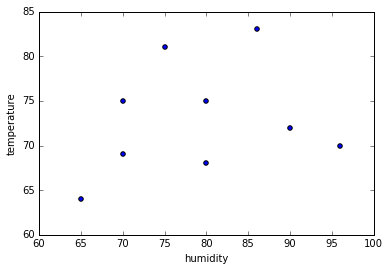

In [15]:
#play tennis 
weather[(weather['play'] == 1)].plot(kind='scatter', x='humidity', y='temperature')

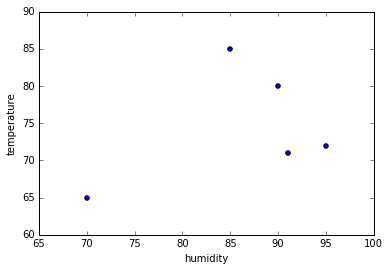

In [16]:
# NO tennis 
weather[(weather['play'] == 0)].plot(kind='scatter', x='humidity', y='temperature')

<h2 align="center"> Problem 2</h2><br>

<strong><p style="font-size:120%;">Question</strong> What problems did you have to deal with when working with these files? 

Most of these files were uniquely different from eachother and because of that, it was difficult to automate cleaning of the files using in my case bash and python. Also some of the files had the population in thousands while others had the actual population. 

In [43]:
#!bash getLineNum.sh
# this gets the line numbers where WY, US, and AL occur
!cat getLineNum.sh

count=0;
WY="WY"
US="US"
AL="AL"
for element in "data/st0009ts.txt" "data/st1019ts.txt" "data/st2029ts.txt" "data/st3039ts.txt" "data/st4049ts.txt" "data/st5060ts.txt" "data/st6070ts.txt" "data/st7080ts.txt" "data/st8090ts.txt"; do
	line1=$(cat $element | grep -ni 'WY \| WY &[0-9]' | grep -Eoi '^[^:]+')
	echo "$WY   $line1" >> "new_$element";
	
	line2=$(cat $element | grep -ni 'U.S. \| US &[0-9]' | grep -Eoi '^[^:]+')
	echo "$US   $line2" >> "new_$element";

	line3=$(cat $element | grep -n 'AL \| AL &[0-9]' | grep -Eoi '^[^:]+')
	echo "$AL   $line3" >> "new_$element";
	((count+=1));
done



In [18]:
# This cell helps with using sed later to get where to trim the files
files = ["new_data/st0009ts.txt", "new_data/st1019ts.txt",\
         "new_data/st2029ts.txt", "new_data/st3039ts.txt",\
         "new_data/st4049ts.txt", "new_data/st5060ts.txt",\
         "new_data/st6070ts.txt", "new_data/st7080ts.txt",\
         "new_data/st8090ts.txt"]
data = ["data/st0009ts.txt", "data/st1019ts.txt",\
         "data/st2029ts.txt", "data/st3039ts.txt",\
         "data/st4049ts.txt", "data/st5060ts.txt",\
         "data/st6070ts.txt", "data/st7080ts.txt",\
         "data/st8090ts.txt"]

f1 = pd.read_fwf("new_data/st0009ts.txt",header = None,  names=["new_data/st0009ts.txt"]);
for f in files[1:]: 
    f2 = pd.read_fwf( f ,header = None,  names=[f]);
    f1 = pd.concat([f1, f2], axis=1)
f1

,new_data/st0009ts.txt,new_data/st1019ts.txt,new_data/st2029ts.txt,new_data/st3039ts.txt,new_data/st4049ts.txt,new_data/st5060ts.txt,new_data/st6070ts.txt,new_data/st7080ts.txt,new_data/st8090ts.txt
WY,72,72,72,72,70,78,75,65,62
US,18,18,18,18,16,19,19,5,4
AL,24,24,24,24,22,28,25,15,12


In [54]:
import os 
count = 0; 

for index, data_file in enumerate(data):
    
    if index == 0:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        df = df.dropna()   
        df = df.transpose()
        df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 1 or index == 2 or index == 3 or index == 4:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 5:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df.columns = ['1950', '1950.1', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 6:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
        new_df.rename(columns={'U.S.': 'US'}, inplace=True)
    elif index == 7:
        temp = f1
        last_two = temp.drop(['US'])
        end_line = last_two[files[index]].max()
        start_line = last_two[files[index]].min()
        !sed "$(($start_line-1)),$(($end_line+1))!d" data/st7080ts.txt >> data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=1, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.index.name = None
        new_df.drop('Fip', axis=1, inplace=True)
        new_df.columns = ['1970', '1971', '1972', '1973', '1974',\
                      '1975', '1976', '1977', '1978', '1979', '1980']
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
    elif index == 8:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line+6)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.columns = ['1980', '1981', '1982', '1983', '1984',\
                      '1985', '1986', '1987', '1988', '1989', '1990']
        new_df = new_df.dropna() 
        new_df = new_df.transpose()
    else: 
        break;
    if index != 0:
        df = pd.concat([df, new_df], axis=0)
    if index == 6:
        df = df.apply(lambda x: x*1000)
        
df = df.fillna(float(0.0))
df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,US,UT,VA,VT,WA,WI,WV,WY,West
1900,0,1830000,1314000,124000,1490000,543000,910000,278000,185000,530000,...,3055000,76094000,277000,1858000,344000,523000,2072000,959000,93000,4112000
1901,0,1907000,1341000,131000,1550000,581000,931000,285000,187000,544000,...,3132000,77585000,284000,1887000,347000,583000,2109000,972000,100000,4351000
1902,0,1935000,1360000,138000,1623000,621000,952000,290000,188000,565000,...,3210000,79160000,292000,1894000,349000,651000,2141000,1000000,105000,4620000
1903,0,1957000,1384000,144000,1702000,652000,972000,295000,190000,587000,...,3291000,80632000,299000,1890000,350000,719000,2171000,1037000,108000,4882000
1904,0,1978000,1419000,151000,1792000,659000,987000,302000,192000,599000,...,3374000,82165000,308000,1889000,353000,782000,2202000,1064000,111000,5127000
1905,0,2012000,1447000,158000,1893000,680000,1010000,308000,194000,615000,...,3459000,83820000,316000,1917000,354000,842000,2231000,1094000,114000,5398000
1906,0,2045000,1465000,167000,1976000,707000,1033000,313000,196000,628000,...,3546000,5437000,327000,1942000,355000,904000,2250000,1122000,118000,5671000
1907,0,2058000,1484000,176000,2054000,733000,1057000,317000,197000,645000,...,3636000,87000000,339000,1952000,355000,967000,2268000,1149000,125000,5934000
1908,0,2070000,1513000,186000,2161000,757000,1077000,321000,199000,684000,...,3727000,88709000,351000,1994000,354000,1028000,2292000,1174000,133000,6234000
1909,0,2108000,1545000,196000,2282000,775000,1097000,327000,201000,724000,...,3821000,90492000,363000,2038000,356000,1091000,2317000,1203000,141000,6557000


<strong><p style="font-size:120%;"></strong> Plot the populations of Alaska and California over time. Don’t forget to label your axes.

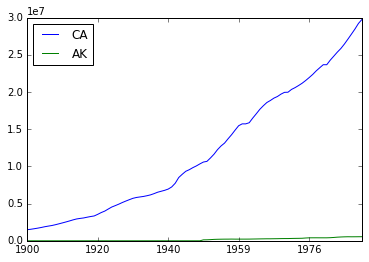

In [55]:
df[["CA", "AK"]].plot()

<strong><p style="font-size:120%;"></strong> Plot the population of New England and the Southwest over time. Don’t forget to label your axes.

In [57]:
# New England States: ME, VT, NH, MA, RI, CT 
# source: http://discovernewengland.org/about-new-england/new-england-states
# Southwest States: Arizona (AZ), New Mexico (NM), Nevada (NV), Utah (UT)) 
# source: http://wikitravel.org/en/Southwest_%28United_States_of_America%29

In [59]:
df["New_England"] = df[["ME", "VT", "NH", "MA", "RI", "CT"]].sum(axis=1)
df["South_west"] = df[["AZ", "NM", "NV", "UT"]].sum(axis=1) 

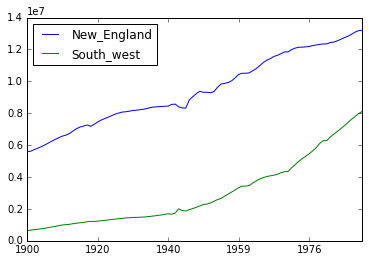

In [60]:
df[["New_England", "South_west"]].plot()

<h2 align="center"> Problem 5</h2><br>

In [24]:
if type('lama') == str:
    print "sex"

sex
